In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as s

In [2]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
def load_data(train_batch_size, test_batch_size):
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size = train_batch_size, shuffle=True)

    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size = test_batch_size, shuffle=True)

    return (train_loader, test_loader)



In [4]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
     
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [5]:
def define_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)



In [7]:
def train(model, optimizer, train_loader):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()



In [8]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costSum = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costSum += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costSum / costCounter, round(correct/total, 3)



In [9]:
def compute(model, optimizer):
    loss_train_arr = []
    loss_test_arr = []
    test_acc_arr = []
    train_acc_arr = []
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_loader)
        tr_loss, tr_acc = calculate_loss(model, train_loader, loss_fn)
        t_loss, t_acc = calculate_loss(model, test_loader, loss_fn)
        print("MODEL TRAINING LOSS --> ", tr_loss)
        loss_train_arr.append(tr_loss)
        loss_test_arr.append(t_loss)
        train_acc_arr.append(tr_acc)
        test_acc_arr.append(t_acc)
    return loss_train_arr, loss_test_arr, train_acc_arr, test_acc_arr



In [10]:
epochs = 15



In [11]:

torch.manual_seed(1)
loss_fn = torch.nn.CrossEntropyLoss()
train_loader, test_loader = load_data(500, 500)
model2 = CNN()
optimizer = define_optimizer(model2)
batch_2_train_loss, batch_2_test_loss, batch_2_train_acc, batch_2_test_acc = compute(model2, optimizer)

batch_param_2 = torch.nn.utils.parameters_to_vector(model2.parameters())

torch.manual_seed(1)
loss_fn = torch.nn.CrossEntropyLoss()
train_loader, test_loader = load_data(100, 100)
model1 = CNN()
optimizer = define_optimizer(model1)
batch_1_train_loss, batch_1_test_loss, batch_1_train_acc, batch_1_test_acc = compute(model1, optimizer)

batch_param_1 = torch.nn.utils.parameters_to_vector(model1.parameters())



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

MODEL TRAINING LOSS -->  tensor(1.4460)
MODEL TRAINING LOSS -->  tensor(0.2385)
MODEL TRAINING LOSS -->  tensor(0.1549)
MODEL TRAINING LOSS -->  tensor(0.1117)
MODEL TRAINING LOSS -->  tensor(0.0946)
MODEL TRAINING LOSS -->  tensor(0.0780)
MODEL TRAINING LOSS -->  tensor(0.0752)
MODEL TRAINING LOSS -->  tensor(0.0613)
MODEL TRAINING LOSS -->  tensor(0.0557)
MODEL TRAINING LOSS -->  tensor(0.0512)
MODEL TRAINING LOSS -->  tensor(0.0491)
MODEL TRAINING LOSS -->  tensor(0.0410)
MODEL TRAINING LOSS -->  tensor(0.0411)
MODEL TRAINING LOSS -->  tensor(0.0448)
MODEL TRAINING LOSS -->  tensor(0.0391)
MODEL TRAINING LOSS -->  tensor(0.1144)
MODEL TRAINING LOSS -->  tensor(0.0830)
MODEL TRAINING LOSS -->  tensor(0.0516)
MODEL TRAINING LOSS -->  tensor(0.0408)
MODEL TRAINING LOSS -->  tensor(0.0422)
MODEL TRAINING LOSS -->  tensor(0.0286)
MODEL TRAINING LOSS -->  tensor(0.0245)
MODEL TRAINING LOSS -->  tensor(0.0212)
MODEL TRA

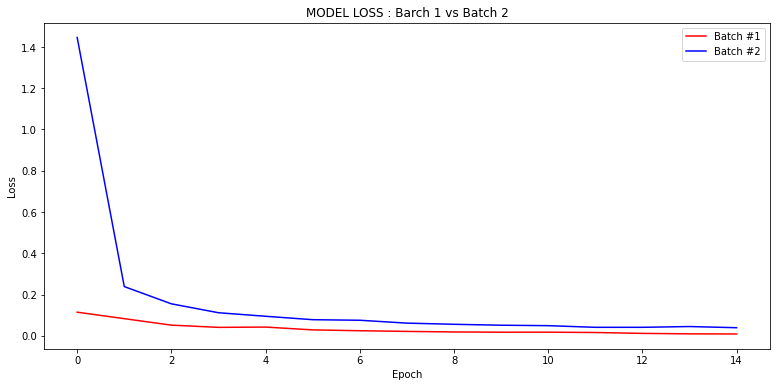

In [14]:
### PLOT 
plt.figure(figsize=(13,6))
plt.plot(np.arange(0, 15, 1), batch_1_train_loss, color = "r")
plt.plot(np.arange(0, 15, 1), batch_2_train_loss, color = "b")
plt.title('MODEL LOSS : Barch 1 vs Batch 2')
plt.legend(['Batch #1', 'Batch #2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



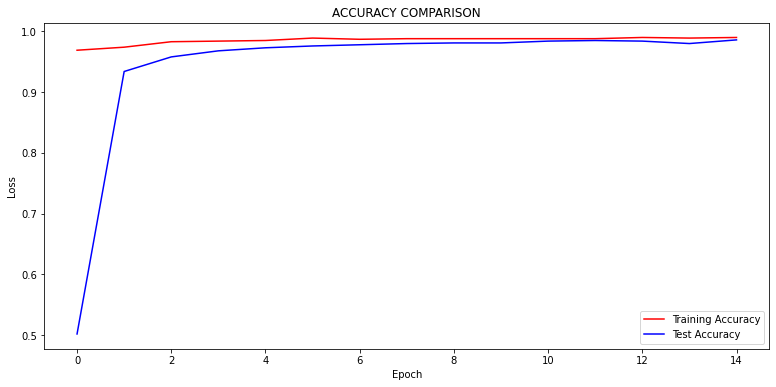

In [16]:
plt.figure(figsize=(13,6))
plt.plot(np.arange(0, 15, 1), batch_1_test_acc, color = "r")
plt.plot(np.arange(0, 15, 1), batch_2_test_acc, color = "b")
plt.title('ACCURACY COMPARISON')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [19]:

#Batch param
alpha = np.linspace(-2.0, 2.0, num = 30)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch_param_1 + alpha[i]* batch_param_2
    thetaArr.append(theta)





In [20]:
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

In [21]:
for i in range (len(thetaArr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* batch_param_1 + alpha[i]*batch_param_2
    model = CNN()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_loss(model, train_loader, loss_fn)
    alpha_test_loss, alpha_test_acc = calculate_loss(model, test_loader, loss_fn)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

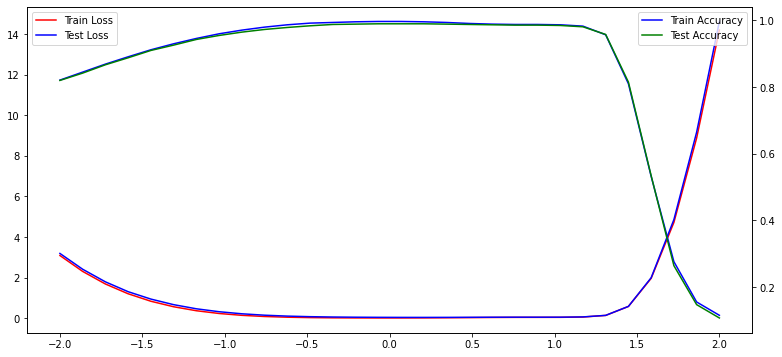

In [22]:
plt.figure(figsize=(13,6))
plt.plot(alpha, alpha_train_loss_arr, color = "r")
plt.plot(alpha, alpha_test_loss_arr, color = "b")
plt.legend(['Train Loss' , 'Test Loss'])

plt.twinx()

plt.plot(alpha, alpha_train_acc_arr, color = "b")
plt.plot(alpha, alpha_test_acc_arr, color = "g")
plt.legend(['Train Accuracy' , 'Test Accuracy'])

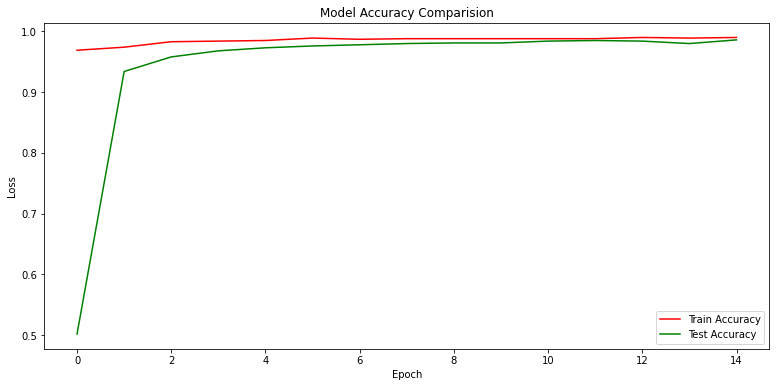

In [24]:

### Accuracy comp
plt.figure(figsize=(13,6))
plt.plot(np.arange(0, 15, 1), batch_1_test_acc, color = "r")
plt.plot(np.arange(0, 15, 1), batch_2_test_acc, color = "g")
plt.title('Model Accuracy Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [25]:
alpha = np.linspace(-2.0, 2.0, num = 50)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch_param_1 + alpha[i]* batch_param_2
    thetaArr.append(theta)



In [26]:
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

In [27]:
#opt

for i in range (len(thetaArr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* batch_param_1 + alpha[i]*batch_param_2
    model = CNN()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()
  
    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_loss(model, train_loader, loss_fn)
    alpha_test_loss, alpha_test_acc = calculate_loss(model, test_loader, loss_fn)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)



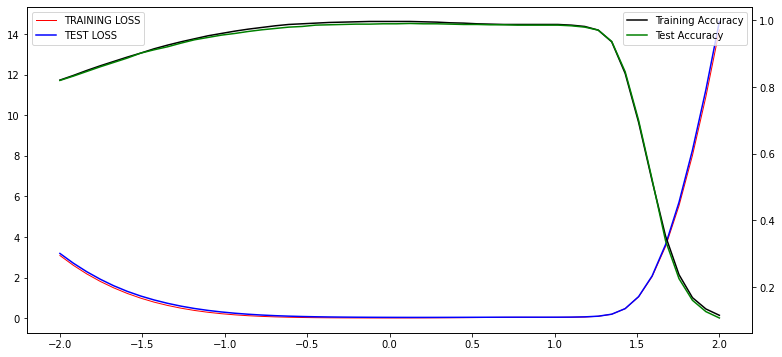

In [30]:

# Train loss v Accuracy
plt.figure(figsize=(13,6))
plt.plot(alpha, alpha_train_loss_arr, color = "r" , linewidth = 1)
plt.plot(alpha, alpha_test_loss_arr, color = "b")
plt.legend(['TRAINING LOSS' , 'TEST LOSS'])

plt.twinx()

plt.plot(alpha, alpha_train_acc_arr, color = "black")
plt.plot(alpha, alpha_test_acc_arr, color = "g")
plt.legend(['Training Accuracy' , 'Test Accuracy'])

